In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

users = ['A','B','C','D','E']
movies = ['Titanic', 'Rocky', 'The Hobbit', 'Fight Club', 'Jurassic Park']
matrix = [[0.82,0.18,0.5,0.1,0.26],
          [0.74,0.26,0.5,0.2,0.32],
          [0.34,0.69,0.5,0.7,0.62],
          [0.58,0.42,0.5,0.4,0.44],
          [0.1,0.9,0.5,1,0.8]]

users_movies = pd.DataFrame(data=matrix, index=users, columns=movies)
users_movies.T

,A,B,C,D,E
Titanic,0.82,0.74,0.34,0.58,0.1
Rocky,0.18,0.26,0.69,0.42,0.9
The Hobbit,0.50,0.50,0.50,0.50,0.5
Fight Club,0.10,0.20,0.70,0.40,1.0
Jurassic Park,0.26,0.32,0.62,0.44,0.8


(a) Calcule o fatora ̧c ̃ao aproximada (SVD) com 2 componentes para a
transposta dessa matriz (Filmes por usuários).

In [34]:
A = users_movies.T
	
u, s, v = np.linalg.svd(A, full_matrices=False)

u_2 = u[:, :2]
s_2 = s[:2]
v_2 = v[:2, :]

u_2 @ np.diag(s_2) @ v_2

array([[0.82007262, 0.74013871, 0.33885906, 0.58027091, 0.1006675 ],
       [0.1809277 , 0.26177214, 0.67542407, 0.42346101, 0.90852763],
       [0.49982665, 0.49966886, 0.50272361, 0.49935329, 0.49840656],
       [0.0995192 , 0.19908155, 0.70755429, 0.39820626, 0.99558037],
       [0.25964218, 0.31931648, 0.62562202, 0.43866507, 0.79671084]])

(b) Desenhe os filmes em dimens ̃ao dois (pode ser na m ̃ao ou em Python
ou Julia) baseado no resultado da quest ̃ao anterior.

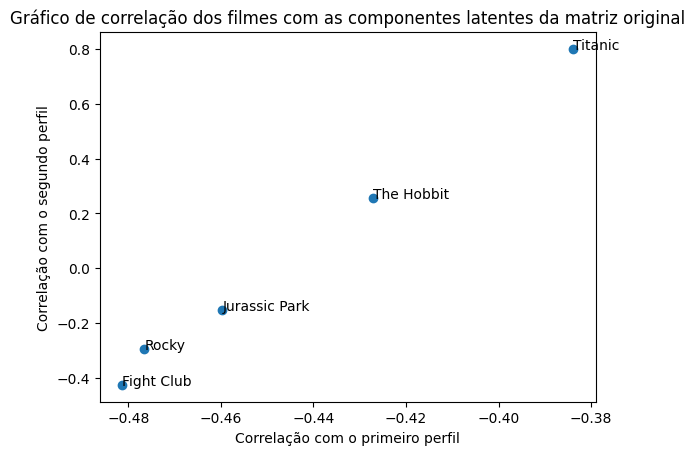

In [36]:
fig, ax = plt.subplots()
u_t = u_2.T # Cada entrada do array N representa a correlação do filme entrada com a componente latente N (Perfil)
ax.scatter(u_t[0, :], u_t[1, :])

for i, name in enumerate(movies):
    ax.annotate(name, (u_t[0, i], u_t[1, i]))

ax.set_xlabel('Correlação com o primeiro perfil')
ax.set_ylabel('Correlação com o segundo perfil')
ax.set_title('Gráfico de correlação dos filmes com as componentes latentes da matriz original')

plt.show()

Podemos pensar na matriz U como uma matriz que correlaciona cada filme a um determinado perfil de opções, ou componente latente. Essa componente latente é uma variável estatística não observável que pode explicar padrões de comportamento em um conjunto de dados.

Como reduzimos para duas dimensões, temos apenas dois componentes latentes presentes nessa decomposição SVD. Assim, filmes que estão próximos um dos outros possuem perfis de avaliação semelhantes, enquanto filmes que estão distantes um do outro possuem perfis de avaliação diferentes. Dessa forma, podemos sugerir filmes baseado nessa regra. Para identificar os usuários em cada "perfil", basta olhar a matriz de vetores singulares V, pois nela existe a correlação de cada usuário com os componentes latentes. 

Se alguém gostou de Titanic, recomenda-se O Hobbit.